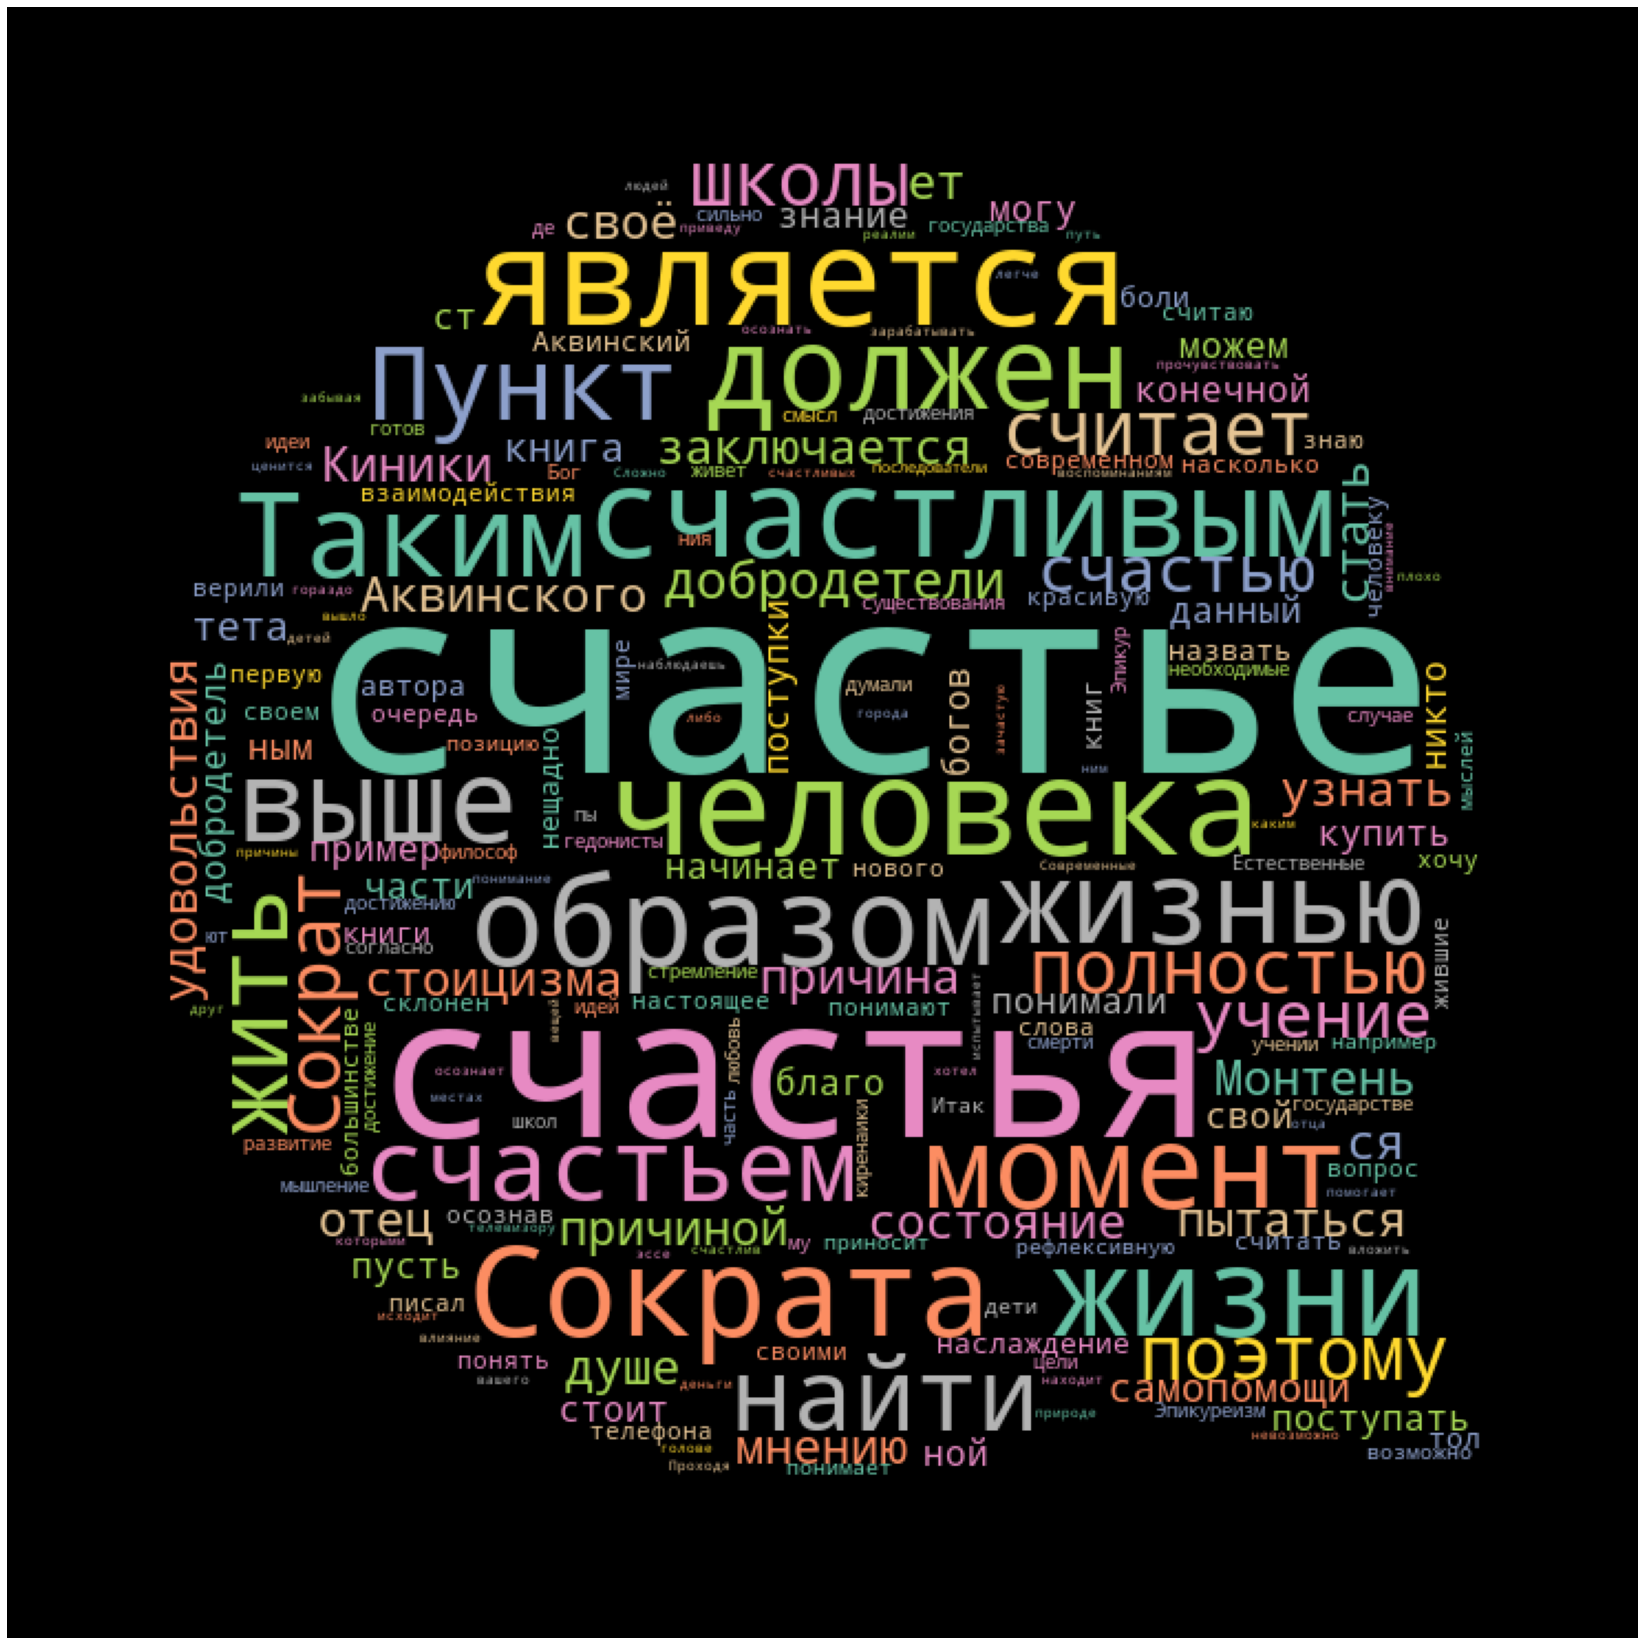

In [1]:
!pip install matplotlib
!pip install wordcloud
!pip install stop_words

import re
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
from wordcloud import WordCloud
from stop_words import get_stop_words

%matplotlib inline

file = open('Rest_Esse.txt', "r", encoding="utf-8") 
text = file.read()

text = re.sub(r'==.*?==+', '', text)
text = re.sub('_', ' ', text)
text = text.replace('\n', '')
    
mask = np.array(Image.open('loc.png'))

STOPWORDS_RU = get_stop_words('russian')

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Set2', 
                      collocations=False, 
                      stopwords = STOPWORDS_RU, 
                      mask=mask).generate(text)
                      
plot_cloud(wordcloud)

wordcloud.to_file('result.png')